# Introduction

Plotly est une bibliothèque Python puissante dédiée à la science des données, à l'apprentissage automatique, ainsi qu’aux opérations liées à l'intelligence artificielle. Vous pouvez utiliser Plotly en ligne, hors ligne et dans des Notebooks Jupyter. Cette librairie permet de créer des visualisations extrêmement puissantes et interactives avec des données.

La bibliothèque graphique Python de Plotly permet de générer des graphiques interactifs de qualité publiable dans des journaux ou sur des sites etc. Comme exemples de création, on peut trouver les tracés linéaires, les nuages de points, les diagrammes en aires, les diagrammes à barres, à barres d'erreur, les diagrammes en boîte, les histogrammes, les cartes thermiques, les sous-tracés,  les axes multiples, les graphiques polaires ou encore les graphiques à bulles.

**Conditions préalables** 

Vous devrez installer certains packages ci-dessous:
<font color='purple'>
* numpy
* pandas
* matplotlib
* pillow
* wordcloud <font color='black'>(Effectuer une analyse exploratoire des données pour le traitement du langage naturel à l'aide de Word Cloud en Python)

<font color='black'>    
La bibliothèque **numpy** est l'une des bibliothèques les plus populaires et les plus utiles qui est utilisée pour gérer les matrices et tableaux multidimensionnels. Elle est également utilisée en combinaison avec la bibliothèque **Pandas** pour effectuer une analyse des données.
Le module **Python os** est une bibliothèque intégrée, vous n'avez donc pas à l'installer.
Pour la visualisation, **matplotlib** est une bibliothèque de base qui permet à de nombreuses autres bibliothèques de s'exécuter et de tracer sur sa base, y compris **seaborn** ou **wordcloud**, que vous utiliserez dans ce tutoriel. La bibliothèque **pillow** est un package qui permet la lecture d'images. Il s'agit d'un wrapper pour PIL - Python Imaging Library. Vous aurez besoin de cette bibliothèque pour lire l'image comme masque pour le wordcloud (nuage de mots)
**wordcloud** peut être un peu difficile à installer. Si vous n'en avez besoin que pour tracer un wordcloud de base, alors pip install wordcloud ou conda install -c conda-forge wordcloud sera suffisant.
    

**Je vous propose de créer un  nouvel environnement conda :**  
`conda create --name plotly`  
Puis d'activer cet environnement   
`conda activate plotly`  

Puis installer les paquets manquant :  
`conda install -c anaconda numpy`  
`conda install -c anaconda pandas`  
`conda install -c anaconda matplotlib`  
`conda install -c anaconda pillow`  
`conda install -c conda-forge wordcloud`  

vérifier les paquets existant :   
`conda list`  

Nous allons utiliser le jeux de données World University Rankings
Vous pouvez acceder à la description de ce jeux de données ici : 
https://www.kaggle.com/mylesoneill/world-university-rankings    

### <br>**Sommaire** :
1. [Chargement des données et explication des fonctionnalités](#1)
1. [Line Charts](#2)
1. [Scatter Charts](#3)
1. [Bar Charts](#4)
1. [Pie Charts](#5)
1. [Bubble Charts](#6)
1. [Histogram](#7)
1. [Word Cloud](#8)
1. [Box Plot](#9)
1. [Scatter Plot Matrix](#10)
1. [Inset Plots](#11)
1. [3D Scatter Plot with Colorscaling](#12)
1. [Multiple Subplots](#13)

**Documentation**  
* https://plotly.com/python-api-reference/
* https://plotly.com/python/

In [83]:
import numpy as np # algèbre linéaire
import pandas as pd # procès de données, CSV file I/O (e.g. pd.read_csv)

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# librairie word cloud
from wordcloud import WordCloud

# librairie matplotlib
import matplotlib.pyplot as plt

# Permet d'afficher les données disponibles dans le répertoire data
import os
print(os.listdir(".")) 


['Tutorial_plotly_hachem.ipynb', '__pycache__', 'graph.png', '.ipynb_checkpoints', 'plotly_tutorial_origin.ipynb', 'plotly_tutorial_done.ipynb', 'plot_example.py', 'data']


<a id="1"></a> <br>
<font color='purple'>
## 1. Chargement des données et explication des fonctionnalités¶

<font color='black'>    
**timesData.csv** comprend 14 fonctionnalités qui sont:   
* **world_rank** : classement mondial de l'université. Contient des plages de rangs et des rangs égaux (par exemple = 94 et 201-250)  
* **university_name** : nom de l'université  
* **country** : pays de chaque université  
* **teaching** : score universitaire pour l'enseignement (l'environnement d'apprentissage)  
* **international** : score universitaire des perspectives internationales (personnel, étudiants, recherche)  
* **research** : score universitaire pour la recherche (volume, revenu et réputation)  
* **citations** : score universitaire pour les citations (influence de la recherche)  
* **income** : score universitaire pour le revenu de l'industrie (transfert de connaissances)  
* **total_score** : score total pour l'université, utilisé pour déterminer le rang  
* **num_students** : nombre d'étudiants à l'université  
* **student_staff_ratio** : nombre d'étudiants divisé par le nombre d'employés  
* **international_students** : Pourcentage d'étudiants internationaux  
* **female_male_ratio** : Ratio étudiant féminin / étudiant masculin  
* **year** : année du classement (2011 à 2016 inclus)  

In [84]:
# Chargement des données qui seront utilisées.
timesData = pd.read_csv("./data/timesData.csv")

In [85]:
timesData[['world_rank', 'university_name','teaching','research', 'citations']][:100]

,world_rank,university_name,teaching,research,citations
0,1,Harvard University,99.7,98.7,98.8
1,2,California Institute of Technology,97.7,98.0,99.9
2,3,Massachusetts Institute of Technology,97.8,91.4,99.9
3,4,Stanford University,98.3,98.1,99.2
4,5,Princeton University,90.9,95.4,99.9
...,...,...,...,...,...
95,95,University of Arizona,52.4,52.2,70.1
96,95,University of Basel,50.2,37.1,78.3
97,98,"University of Maryland, College Park",45.4,48.6,79.2
98,99,Dartmouth College,44.7,49.2,79.7


In [86]:
timesData[['university_name','num_students', 'female_male_ratio']]

,university_name,num_students,female_male_ratio
0,Harvard University,"20,152",NaN
1,California Institute of Technology,"2,243",33 : 67
2,Massachusetts Institute of Technology,"11,074",37 : 63
3,Stanford University,"15,596",42 : 58
4,Princeton University,"7,929",45 : 55
...,...,...,...
2598,Yeungnam University,"21,958",48 : 52
2599,Yıldız Technical University,"31,268",36 : 64
2600,Yokohama City University,"4,122",NaN
2601,Yokohama National University,"10,117",28 : 72


In [87]:
# information about timesData
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [88]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


<a id="2"></a> <br>
<font color='purple'>
## 2. Line Charts
    
<font color='black'>    
Exemple de graphiques linéaires : citation et enseignement comparé au classement mondial des 100 meilleures universités

 * Importe les objets graph via "go"
 * Création de traces 
     * x : axe x 
     * y : axe y 
     * mode: type de tracé comme marqueur, ligne ou ligne + marqueurs 
     * name : nom des plots 
     * marker : marker est utilisé comme un dictionnaire. 
         * color : couleur des lignes. Il faut du RVB (rouge, vert, bleu) et l'opacité (alpha) 
     * text : Le texte du survol (le survol est un curseur) 
 * data : est une liste à laquelle nous ajoutons des traces 
 * layout : c'est un dictionnaire. 
     * title : titre de la mise en page 
     * x axis : c'est le dictionnaire 
         * title : étiquette de l'axe des x 
         * ticklen : longueur des marques de l'axe x 
         * zeroline : montrant zéro ligne ou non 
 * fig : il comprend les données et la mise en page 
 * iplot() : trace la figure (fig) créée par les données et la disposition

In [89]:
# Prépare les trames de données (data frame)
df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Création de la trame 1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = df.university_name)
# Création de la trame 2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "enseignement",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text = df.university_name)

data = [trace1, trace2]
layout = dict(title = 'Citation et enseignement comparé au classement mondial des 100 meilleures universités',
              xaxis = dict(title = 'Rang Mondial',ticklen = 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<a id="3"></a> <br>
<font color='purple'>
## 3. Scatter

<font color='black'>
Exemple de dispersion: Citation par rapport au classement mondial des 100 meilleures universités, années 2014, 2015 et 2016

 * Importe les objets graph via "go" 
 * Création de traces 
     * x : axe x 
     * y : axe y 
     * mode: type de tracé comme marqueur, ligne ou ligne + marqueurs 
     * name : nom des plots 
     * marker : marker est utilisé comme un dictionnaire. 
         * color : couleur des lignes. Il faut du RVB (rouge, vert, bleu) et l'opacité (alpha) 
     * text : Le texte du survol (le survol est un curseur) 
 * data : est une liste à laquelle nous ajoutons des traces 
 * layout : c'est un dictionnaire. 
     * title : titre de la mise en page 
     * x axis : c'est le dictionnaire 
         * title : étiquette de l'axe des x 
         * ticklen : longueur des marques de l'axe x 
         * zeroline : montrant zéro ligne ou non
     * y axis : C'est un dictionnaire et le même pour chacun des axes x
 * fig : il comprend les données et la mise en page 
 * iplot() : trace la figure (fig) créée par les données et la disposition

In [90]:
# Préparation des trames de données (data frame)
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go

# Création de la trace 1 _ 2014
    trace1 =go.Scatter(
                        x = df2014.world_rank,
                        y = df2014.citations,
                        mode = "markers",
                        name = "2014",
                        marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                        text = df2014.university_name)
# Création de la trace 2 _ 2015
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = df2015.university_name)
# Création de la trace 3 _ 2016
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citation par rapport au classement mondial des 100 meilleures universités, années 2014, 2015 et 2016',
              xaxis = dict(title = 'Rang Mondial',ticklen = 5,zeroline = False),
              yaxis = dict(title = 'Citation',ticklen= 5,zeroline = False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [91]:
timesData.groupby('country').world_rank.count().sort_values(ascending=False).head(10)

country
United States of America    659
United Kingdom              300
Germany                     152
Australia                   117
Canada                      108
Japan                        98
Italy                        94
China                        83
Netherlands                  75
France                       73
Name: world_rank, dtype: int64

In [92]:
timesData.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [93]:
dfFR = timesData[timesData.country=='France']
dfUSA = timesData[timesData.country=='USA']
num_studentsFR  = [float(each.replace(',','.')) for each in dfFR.num_students]
num_studentsUSA  = [float(str(num).replace(',','.')) for num in dfUSA.num_students]

In [94]:
# Création de la trace 1 _ 2014
dfFR = timesData[timesData.country=='France']
dfFR["year_test"] = [str(y) for y in dfFR.year]
dfFR['uni_year'] = dfFR[['university_name', 'year_test']].apply(lambda x: ', '.join(x), axis=1)
trace1 =go.Scatter(
                    x = dfFR.income,
                    y = dfFR.teaching,
                    mode = "markers",
                    name = "France",
                    marker = dict(color = 'green', #num_studentsFR,
                                  size = 10,# dfFR.year  ,
                                  sizeref=0.5),
                                  #colorscale='Viridis', 
                                  #colorbar=dict(thickness=20)),
                    text = dfFR['uni_year'])
# Création de la trace 2 _ 2015
dfUSA = timesData[timesData.country=='United States of America'].fillna(0)
dfUSA["year_test"] = [str(y) for y in dfUSA.year]
dfUSA['uni_year'] = dfUSA[['university_name', 'year_test']].apply(lambda x: ', '.join(x), axis=1)
trace2 =go.Scatter(
                    x = dfUSA.world_rank,
                    y = dfUSA.teaching,
                    mode = "markers",
                    name = "USA",
                    marker = dict(color = 'red', #num_studentsUSA,
                                  size =10 ,#dfUSA.year,
                                  sizeref=0.5),
                                  #colorscale='Viridis', 
                                  #colorbar=dict(thickness=20)),
                    text = dfUSA.uni_year)
# Création de la trace 3 _ 2016
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = df2016.university_name)
data = [trace1, trace2]#, trace3]
layout = dict(title = 'Citation par rapport au classement mondial des 100 meilleures universités, années 2014, 2015 et 2016',
              xaxis = dict(title = 'Rang Mondial',ticklen = 5,zeroline = False),
              yaxis = dict(title = 'Citation',ticklen= 5,zeroline = False),
              showlegend=True,
              legend=dict(x=0.029,y=1.038,font=dict(size=12),traceorder="normal")
             )

#axis_style=dict(zeroline=False, showline=True, mirror=True)
fig = dict(data = data, layout = layout)
iplot(fig)

In [95]:
dfUSA

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,year_test,uni_year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,0,2011,2011,"Harvard University, 2011"
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011,2011,"California Institute of Technology, 2011"
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011,2011,"Massachusetts Institute of Technology, 2011"
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011,2011,"Stanford University, 2011"
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011,2011,"Princeton University, 2011"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,601-800,Ohio University,United States of America,25.0,33.6,14.9,24.6,30.1,-,"22,224",20.0,10%,50 : 50,2016,2016,"Ohio University, 2016"
2542,601-800,Rochester Institute of Technology,United States of America,17.4,29.8,13.4,25.1,30.4,-,"12,965",13.5,13%,34 : 66,2016,2016,"Rochester Institute of Technology, 2016"
2564,601-800,University of Southern Mississippi,United States of America,21.0,20.8,11.8,20.1,39.9,-,"14,569",18.5,3%,63 : 37,2016,2016,"University of Southern Mississippi, 2016"
2574,601-800,University of Texas at El Paso,United States of America,18.6,30.4,18.7,18.4,-,-,"19,123",29.0,7%,54 : 46,2016,2016,"University of Texas at El Paso, 2016"


<a id="4"></a> <br>
<font color='purple'>
## 4. Bar Charts

<font color='black'>
Premier exemple de graphique à barres : Citations et enseignement des 3 meilleures universités en 2014

 * Importe les objets graph via "go"
 * Création de traces 
     * x : axe x 
     * y : axe y 
     * mode: type de tracé comme marqueur, ligne ou ligne + marqueurs 
     * name : nom des plots 
     * marker : marker est utilisé comme un dictionnaire. 
         * color : couleur des lignes. Il faut du RVB (rouge, vert, bleu) et l'opacité (alpha) 
         * line : C'est un dictionnaire. Ligne entre les barres
            * color = couleur des lignes autour des barres
     * text : Le texte du survol (le survol est un curseur) 
 * data : est une liste à laquelle nous ajoutons des traces 
 * layout : c'est un dictionnaire. 
     * barmode : mode barre (barres de type groupé)
 * fig : il comprend les données et la mise en page 
 * iplot() : trace la figure (fig) créée par les données et la disposition

In [96]:
# Préparation des trames de données
df2014 = timesData[(timesData.year == 2014) & (timesData.teaching >= 90)].iloc[:,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1005,4,Stanford University,United States of America,94.7,68.0,96.8,99.1,61.3,93.8,"15,596",7.8,22%,42 : 58,2014
1006,5,Massachusetts Institute of Technology,United States of America,92.9,82.0,89.0,100.0,94.3,93.0,"11,074",9.0,33%,37 : 63,2014
1008,7,University of Cambridge,United Kingdom,90.6,86.7,95.3,95.7,52.8,92.3,"18,812",11.8,34%,46 : 54,2014


In [97]:
timesData.teaching.dtype

dtype('float64')

In [98]:
# Préparation des trames de données
df2014 = timesData[(timesData.teaching < timesData.citations) & (timesData.citations>50)].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

# Création de la première trace 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = df2014.country)

# Création de la deuxième trace 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "enseignement",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line = dict(color = 'rgb(0,0,0)',width = 1.5)),
                text = df2014.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Exemple de deuxième graphique à barres : citations et enseignement des 3 meilleures universités en 2014.

 * Importe les objets graph via "go"
 * Création de traces 
     * x : axe x 
     * y : axe y 
     * name : nom des plots
     *type = type of plot like bar plot
 * data : est une liste à laquelle nous ajoutons des traces 
 * layout : c'est un dictionnaire. 
     * xaxis : étiquette de l'axe x
     * barmode : mode barre de type groupé (exemple précédent) ou relatif
     * title : titre de la mise en page
 * fig : il comprend les données et la mise en page 
 * iplot() : trace la figure (fig) créée par les données et la disposition

In [99]:
# Préparartion des trames de données
df2014 = timesData[timesData.year == 2014].iloc[-3:,:]
# import graph objects as "go"
import plotly.graph_objs as go

x = df2014.university_name

trace1 = {
  'x': x,
  'y': df2014.citations,
  'name': 'citation',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': df2014.teaching,
  'name': 'enseignement',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top des 3 meilleurs universités'},
  'barmode': 'relative',
  'title': 'Citations et enseignement des 3 meilleures universités en 2014'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Si vous changez seulement le paramètre 'barmode' en relatif dans l'exemple précédent, vous réalisez la même chose que ce deuxième exemple. Cependant, il est possible d'utiliser différentes syntaxes.

Troisième example de graphique à barres : Horizontal bar charts. (style3) Citation vs income for universities

* Import graph_objs as go and importing tools
    * Tools: utilisé pour les sous-tracés
* Création de la trace 1
    * bar: bar plot
        * x : axe x
        * y : axe y 
        * marqueur
            * color : couleur des barres
            * line : couleur et largeur de la ligne de barreh
        * name: nom de la barre
        * orientation: orientation (horizontale)
            * création de la trace 2
            * scatter : Nuage de points
                * x : axe x
                * y : axe y
                * mode : ligne de type scatter line + marqueurs ou uniquement marqueurs
                * line : propriétés de la ligne
                    * color: couleur de la ligne
                * name: nom du nuage de points
    * layout: propriétés de l'axe, de la légende, de la marge, du papier et du tracé

In [100]:
# import graph objects as "go" and import tools
import plotly.graph_objs as go
from plotly import subplots
import matplotlib.pyplot as plt
# Préparation des trames de données
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

y_saving = [each for each in df2016.research]
y_net_worth  = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth  = [each for each in df2016.university_name]
trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='recherche',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='revenus',
)
layout = dict(
                title='Citations and revenus',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

In [101]:
timesData[timesData.year == 2016].iloc[:7,:]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46 : 54,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42 : 58,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,"18,812",11.8,34%,46 : 54,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,"11,074",9.0,33%,37 : 63,2016
1808,6,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,"20,152",8.9,25%,NaN,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,"7,929",8.4,27%,45 : 55,2016


<a id="5"></a> <br>
<font color='purple'>
## 5. Pie Charts

<font color='black'>
Exemple de graphique à secteurs : Proportion des étudiants des 7 meilleures universités en 2016

* fig : créer des figures
    * data : ptype de tracé
        * values : valeurs du tracé
        * labels : étiquettes de tracé
        * name : nom du tracé
        * hoverinfo : informations en survol
        * hole : hole width
        * type : type de tracé (pie)
    * layout : layout of plot
        * title : titre de la mise en page
        * annotations : police, showarrow, texte, x, y

In [102]:
# Préparation des données
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name

# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Proportion du nombre d'étudiants",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Proportion du nombre d'étudiants par université",
        "annotations": [
            { "font": { "size": 15},
              "showarrow": False,
              "text": "Nombre d'étudiants",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

<a id="6"></a> <br>
<font color='purple'>
## 6. Bubble Charts

<font color='black'>
Exemple de graphiques à bulles: classement mondial universitaire (20 premiers) en fonction du score d'enseignement (en considérant le nombre d'étudiants (taille) et le score international (couleur) en 2016)

* x : axe des x
* y : axe des y 
* mode : marqueurs (scatter)
* marker : propriétés du marqueur
    * color : troisième dimension du tracé. Score international
    * size : quatrième dimension de la parcelle. Nombre d'étudiants
* text : noms des universités

In [103]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1803 to 1809
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              7 non-null      object 
 1   university_name         7 non-null      object 
 2   country                 7 non-null      object 
 3   teaching                7 non-null      float64
 4   international           7 non-null      object 
 5   research                7 non-null      float64
 6   citations               7 non-null      float64
 7   income                  7 non-null      object 
 8   total_score             7 non-null      object 
 9   num_students            7 non-null      object 
 10  student_staff_ratio     7 non-null      float64
 11  international_students  7 non-null      object 
 12  female_male_ratio       6 non-null      object 
 13  year                    7 non-null      int64  
dtypes: float64(4), int64(1), object(9)
memor

In [104]:
# Préparation des données
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]

data = [
    {
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text" :  df2016.university_name,
        }
]
layout = dict(title = "Classement des universités par score d'enseignement",
            xaxis_title="Enseignement",
            yaxis_title="Classement mondial",
            showlegend=True,
            legend=dict(x=0.029,y=1.038,font=dict(size=12),traceorder="normal")   
             )

fig = dict(data=data, layout=layout)
iplot(fig)

<font color='blue'>
Exercice : En vous aidant de la syntaxe que l'on a précédemment vu, rajoutez un titre à ce graphique

<a id="7"></a> <br>
<font color='purple'>
## 7. Histogram

<font color='black'>
Exemple d'histogramme montrant la proportion élèves-personnel en 2011 et en 2012.

* trace1 : premier histogramme
    * x : axe des x
    * y : axe des y
    * opacity : opacité de l'histogramme
    * name : nom de la légende
    * marker : couleur de l'histogramme
* trace2 : second histogramme
* layout : mise en page
    * barmode = mode de l'histogramme : overlay (superposition). Autre option disponible : stack (pile)

In [105]:
# Préparation des données
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title= "Nombre d'universités par échelle de proportion élèves-personnel",
                   xaxis=dict(title='proportion élèves-personnel'),
                   yaxis=dict( title='Taux'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [106]:
timesData.student_staff_ratio[timesData.year == 2011]

0       8.9
1       6.9
2       9.0
3       7.8
4       8.4
       ... 
195    19.0
196     9.2
197    15.9
198    28.3
199     4.6
Name: student_staff_ratio, Length: 200, dtype: float64

In [107]:
timesData.student_staff_ratio[timesData.year == 2011].loc[(timesData.student_staff_ratio >=10) &(timesData.student_staff_ratio <=14.9)].count()

58

<a id="8"></a> <br>
<font color='purple'>
## 8. Word Cloud

<font color='black'>    
Nuage de mots
Pays le plus mentionné en 2011.

* WordCloud : bibliothèque de nuages de mots
    * background_color : couleur du fond
    * generate : génère la liste des noms de pays (x2011) sous forme de word cloud
    
A noter qu'on n'utilise pas pyplot

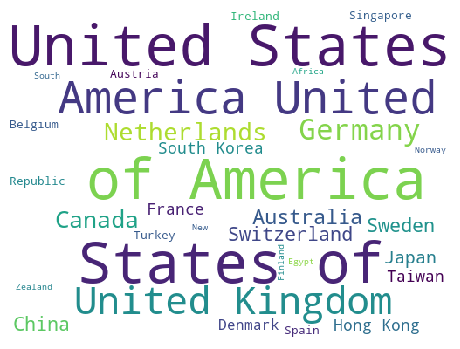

In [108]:
# Préparation des données
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

<a id="9"></a> <br>
<font color='purple'>
## 9. Box Plots

<font color='black'>    
* Median (50th percentile) = valeur moyenne de l'ensemble de données. Cette méthode permet de triez et de prendre les données au milieu. On appelle également 50% percentile, soit 50% des données sont inférieures à la médiane (50e quartile) (quartile). 

    * 25e centile : quartile 1 (Q1) qui est le quartile inférieur
    * 75e centile : quartile 3 (Q3) qui est le quartile supérieur
    * hauteur de la boîte = IQR : plage interquartile = Q3-Q1
    * Whiskers : 1,5 * IQR (par rapport aux T1 et T3)
    * Valeurs aberrantes : étant plus de 1,5 * IQR (généralement loin de la médiane).

* trace : type de trace 'box'
    * y : données que nous voulons visualiser avec le diagramme en boîte
    * marker : de type 'color'

In [109]:
# Préparation des données
x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(
    y=x2015.total_score,
    name = 'score total des universités en 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.research,
    name = 'recherche des université en 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

<a id="10"></a> <br>
<font color='purple'>
## 10. Scatter Matrix Plots

<font color='black'>
Graphiques à matrice de dispersion¶
La matrice de dispersion met en évidence la covariance et la relation entre plus de 2 caractéristiques. 
La covariance entre deux variables aléatoires est un nombre permettant de quantifier leurs écarts conjoints par rapport à leurs espérances respectives. Elle s’utilise également pour deux séries de données numériques (écarts par rapport aux moyennes).

* import figure factory as ff
* create_scatterplotmatrix : crée un nuage de points
    * data2015 : données préparées. Il comprend la recherche, les scores internationaux et totaux avec un indice de 1 à 401.
    * colormap : carte couleur du nuage de points (scatter plot)
    * colormap_type : type de couleur du nuage de points
    * height : hauteur
    * weight : largeur

In [110]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

In [111]:
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015

,research,international,total_score
1402,98.1,67.0,94.3
1403,98.6,67.6,93.3
1404,97.7,90.7,93.2
1405,96.7,69.0,92.9
1406,95.6,87.8,92.0
...,...,...,...
1798,16.3,43.1,-
1799,27.5,36.0,-
1800,22.4,50.1,-
1801,17.4,33.1,-


In [112]:
98.1+67+94

259.1

<font color='green'>
Vous pouvez notez que la légende affichée est en anglais car elle provient directement du set de données 

<a id="11"></a> <br>
<font color='purple'>
## 11. Inset Plots

<font color='black'>
Inset Matrix (Matrice d'écart) : 2 tracés sont dans une image

In [113]:
# Premier tracé
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "enseignement",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# Second tracé
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "revenu",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Revenu et enseignement par rapport au classement mondial des universités'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="12"></a> <br>
<font color='purple'>
## 12. 3D Scatter Plot with colorscaling

<font color='black'>
Diagramme de dispersion 3D

Parfois, deux dimensions pour représenter des données ne sont pas suffisante pour les interpréter. L'ajout d'une dimension supplémentaire peut être necéssaire à la compréhension de ces données. 
L'ajout d'une couleur représente la 4ème dimension.

* go.Scatter3d : créer un nuage de points 3D
* x, y, z : axe des tracés
* mode : marché dispersé
* size : taille du marqueur
* color : axe de l'échelle des couleurs
* colorscale (échelle de couleurs) : 4ème dimension

In [140]:
# Le premier tracé est une dispersion 3D
trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(230,200,100)',   # définir la couleur dans un tableau ou une liste de valeurs souhaitées     
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


Exercice : Vous pouvez remarquer que le diagramme de dispersion 3D ci-dessus ne contient pas de légende, en lisant le code, quel sens peut-on donner aux données ? 

<a id="13"></a> <br>
<font color='purple'>
## 13. Multiple Subplots

<font color='black'>
Plusieurs sous-tracés: lors de la comparaison de plusieurs entités, plusieurs sous-tracés peuvent être utiles.

In [139]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "recherche"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "revenu"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "Score total"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Recherche, citation, revenu et score total en fonction du classement mondial des universités'
)


iplot(fig)

### Exercices


    
1. Quels sont les pays dans lesquels le score universitaire pour le transfert de connaissance de l'industrie se démarque ? Utiliser un ou plusieurs graphique pour justifier votre réponse.
    
2. Existe-t-il une corrélation entre le score universitaire pour le revenu de l'industrie et le score universitaire des perspectives internationales ? Utiliser un ou plusieurs graphique pour justifier votre réponse.

3. Proposer un cas d'étude qui justifie un diagramme de dispersion 3D (en utilisant ce même jeux de données).



**Vous pouvez si vous le désirez travailler par groupe de 2 ou 3 personnes.**  


***

Nous arrivons à la fin de ce tutoriel, si vous avez besoin de changer d'environnement conda, vous pouvez taper la commande **conda** suivante :  
`conda deactivate`

***

#### 1. Quels sont les pays dans lesquels le score universitaire pour le transfert de connaissance de l'industrie se démarque ? Utiliser un ou plusieurs graphique pour justifier votre réponse.

##### stacked barplot of top 20 countries as per income score (regardless of year)

In [116]:
import plotly.graph_objs as go

dfClass = timesData.sort_values('income', ascending=False)[:20]

# Création de la première trace 
trace1 = go.Bar(
                x = dfClass.country,
                y = dfClass.income,
                name = "revenu",
                marker = dict(color = 'rgba(250, 184, 1, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = dfClass.university_name)

layout = dict(title = "Classement des universités par score d'enseignement",
            xaxis_title="Enseignement",
            yaxis_title="Classement mondial",
            showlegend=True,
            legend=dict(x=0.029,y=1.038,font=dict(size=12),traceorder="normal")   
             )
data = [trace1]
layout = go.Layout(barmode = "stack",
                    title = "Top pays selon le revenu cumulé des universités",
                    xaxis_title="Pays",
                    yaxis_title="Classement mondial cumulé")
fig = go.Figure(data = data, layout=layout)
iplot(fig)
print("À noter: Les top 20 pays selon le revenu en une certaine année possèdent tous un score de 100")

À noter: Les top 20 pays selon le revenu en une certaine année possèdent tous un score de 100


Ce graphique représente les 20 premiers pays selon le revenu. Aucune séléction n'a été faite sur l'année du score, ce qui peut rendre le résultat moins pertinent. Par exemple, la Bélgique et de la Chine sont classées en premier grace aux universités de Leuven et de Pékin qui apparaîssent trois fois, chaque fois pour une année différente.

Pour creuser plus profondement, on pourrait regarder d'autres variables: la moyenne du score de revenu par pays, l'évolution de ce score au fil des années, et tout simplement plotter les données brutes du score de revenu pour chaque pays. 

##### Barplot country classification as per average income score

In [117]:
df_bis = timesData
df_bis.income = pd.to_numeric(df_bis.income, errors='coerce')

Text(0, 0.5, 'Score moyen du revenu')

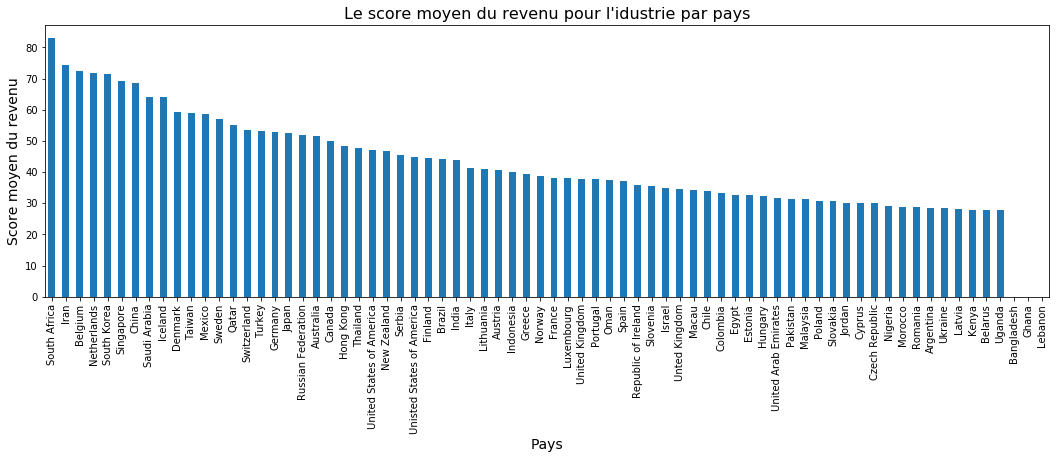

In [118]:
ax = df_bis.groupby(['country']).income.mean().sort_values(ascending=False).plot(kind='bar', figsize = (18,5))
ax.set_xlabel('Pays', fontsize=14)
ax.set_title("Le score moyen du revenu pour l'idustrie par pays",fontsize=16)
ax.set_ylabel("Score moyen du revenu", fontsize=14)

##### Evolution of the average of income scores per country (top 10)

In [119]:
# Préparartion des trames de données
countries = df_bis.groupby('country').income.mean().sort_values(ascending=False)[:10].reset_index().country.unique()
# import graph objects as "go"
import plotly.graph_objs as go
data_plot =[]

for pays in countries:
    data = df_bis.loc[df_bis.country==pays].groupby('year').income.mean()[:10].reset_index()
    trace = {
        'x': data.year,
        'y': data.income,
        'name': pays,
        'type':'bar'
        
    }
    data_plot.append(trace)

layout = {
  'xaxis': {'title': 'Année'},
  'barmode': 'relative',
  'title': 'Évolution du classement des top 10 pays par revenu'
};
fig = go.Figure(data = data_plot, layout = layout)
iplot(fig)

Same graph, unstacked, with lines to showcase the evolution

Text(0.5, 1.0, 'Évolution de la moyenne des scores de revenu pour les top 10 pays ')

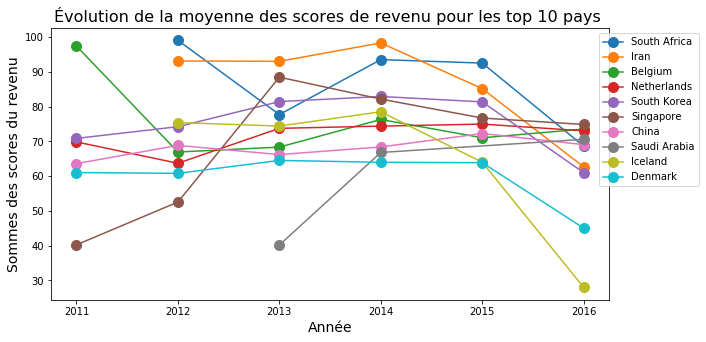

In [120]:
countries = df_bis.groupby('country').income.mean().sort_values(ascending=False)[:10].reset_index().country.unique()
fig, ax = plt.subplots(1,1, figsize=(10,5))
for pays in countries:
    data = df_bis.loc[df_bis.country==pays].groupby('year').income.mean()[:10]
    plt.plot(data.index,data, label = pays, marker='o', markersize=10)
plt.legend(bbox_to_anchor=(.57, 0.1, 0.6, 0.9))
plt.xlabel('Année', fontsize=14)
plt.ylabel('Sommes des scores du revenu', fontsize=14)
plt.title("Évolution de la moyenne des scores de revenu pour les top 10 pays ", fontsize=16)

In [121]:
data

year
2011    61.033333
2012    60.800000
2013    64.520000
2014    63.980000
2015    63.860000
2016    45.050000
Name: income, dtype: float64

##### Evolution of the sum of income scores per country (top 10)

Bien entendu, plus le pays a des universités, plus la somme des scores augmente


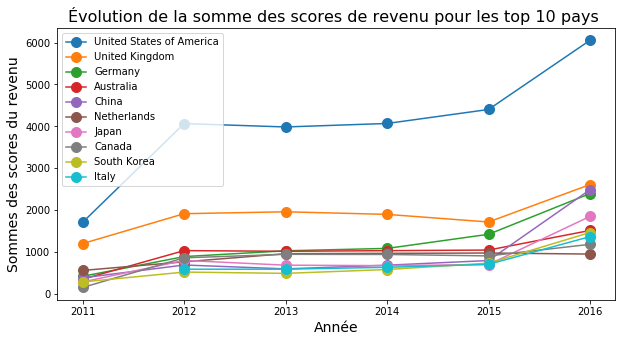

In [122]:
countries = df_bis.groupby('country').income.sum().sort_values(ascending=False)[:10].reset_index().country.unique()
fig, ax = plt.subplots(1,1, figsize=(10,5))
for pays in countries:
    plt.plot(df_bis.loc[df_bis.country==pays].set_index('year').groupby('year').income.sum()[:10], label = pays, marker='o', markersize=10)
plt.legend()
plt.xlabel('Année', fontsize=14)
plt.ylabel('Sommes des scores du revenu', fontsize=14)
plt.title("Évolution de la somme des scores de revenu pour les top 10 pays ", fontsize=16)
print('Bien entendu, plus le pays a des universités, plus la somme des scores augmente')

##### Scatterplot income vs. country

In [123]:
import plotly.express as px
fig = px.scatter(timesData, x='country', y='income', color='year', title='Income per country', hover_data=["university_name"], color_continuous_scale=px.colors.sequential.Viridis )
fig.show()
print("Gros avantage de ce graphique : On peut voir la densité du nombre d'universités par pays, par ans. Ça peut expliquer les résultats des graphiques précédents.")
print('Remarques : Pas suffisemment de données des pays avec les plus faibles revenu')
print("Grande variation au sein d'un même pays des scores de ses différentes universités en une année donnée")

Gros avantage de ce graphique : On peut voir la densité du nombre d'universités par pays, par ans. Ça peut expliquer les résultats des graphiques précédents.
Remarques : Pas suffisemment de données des pays avec les plus faibles revenu
Grande variation au sein d'un même pays des scores de ses différentes universités en une année donnée


In [124]:
df_bis.groupby('country').income.mean().sort_values(ascending=False)

country
South Africa    83.036842
Iran            74.441667
Belgium         72.536111
Netherlands     71.840278
South Korea     71.364912
                  ...    
Belarus         28.000000
Uganda          28.000000
Bangladesh            NaN
Ghana                 NaN
Lebanon               NaN
Name: income, Length: 72, dtype: float64

#### 2. Existe-t-il une corrélation entre le score universitaire pour le revenu de l'industrie et le score universitaire des perspectives internationales ? Utiliser un ou plusieurs graphique pour justifier votre réponse.

##### Scatter plot

In [125]:
dfRevInt = timesData[['income', 'international','year']]
dfRevInt["year"] = dfRevInt["year"].astype("|S") # just for getting a descrete (dotted) colormap rather than a continuous color spectrum

In [126]:
import plotly.express as px
fig = px.scatter(dfRevInt, x='income', y='international', color='year', title='International score in terms of the income score per year' )
fig.show()
print("Preliminarily, this scatter plot does not show any correlation between the two variables.")
print("For further confirmation, one might separate this plot into 6 subplots each one corresponding to a specific year")

Preliminarily, this scatter plot does not show any correlation between the two variables.
For further confirmation, one might separate this plot into 6 subplots each one corresponding to a specific year


##### Subplots of the scatter plot for to each year

In [127]:
from plotly.subplots import make_subplots

years = timesData.year.unique()
fig = make_subplots(rows=3, cols=2, start_cell="bottom-left",shared_xaxes=True, 
                    vertical_spacing=0.02)
row_col = [(1,1), (1,2), (2,1), (2,2), (3,1), (3,2) ]
for i in range(len(years)):
    data_frame=timesData.loc[timesData.year == years[i]]
    fig.add_trace(go.Scatter(x=data_frame.income, y=data_frame.international, mode='markers', name=str(years[i]))
              ,row=row_col[i][0], col=row_col[i][1])
          
fig.update_xaxes(title_text="revenu", row=1,col=2)   
fig.update_xaxes(title_text="revenu", row=1,col=1) 
fig.update_yaxes(title_text="international", row=1, col=1)
fig.update_yaxes(title_text="international", row=2, col=1)
fig.update_yaxes(title_text="international", row=3, col=1)
fig.show()

print("Obviously, there is no correlation between the income and international score for neither year.")
print("One can prove this result by mathematically computing the correlation matrix between the two variables.")

Obviously, there is no correlation between the income and international score for neither year.
One can prove this result by mathematically computing the correlation matrix between the two variables.


##### Correlation Matrix

In [128]:
timesData.international = pd.to_numeric(timesData.international, errors='coerce') # must be transformed to float type for calculations
# the option errors = 'coerce' denotes missing or non-numeric values as NaN

In [129]:
timesData[['income','international']].loc[(timesData.international.isna()==True) | (timesData.income.isna()==True)]

,income,international
4,NaN,70.3
7,NaN,39.6
9,NaN,59.2
10,NaN,48.1
11,NaN,62.8
...,...,...
2566,NaN,31.6
2573,NaN,16.5
2574,NaN,30.4
2575,NaN,36.8


In [130]:
inc = np.array([i for i in timesData.dropna().income])
inter = np.array([i for i in timesData.dropna().international]) 

# entire rows are dropped if they contain an NaN as they result in NaN in the correlation matrix
# in this case 223 row are dropped from the dataframe

In [131]:
# NumPy function that computes the correlation matrix between the two variables
# Diagonals always equal to 1. The rest of the values are between -1 and 1
# Variables are correlated if the non-diagonal values are close to either -1 or 1

corr_matrix = np.corrcoef(inc,inter)
print("The correlation matrix between income score and international score is :\n {}\n".format(corr_matrix))

print("Since non-diagonal values are << 1, the income and international scores are not correlated")

The correlation matrix between income score and international score is :
 [[1.         0.03981894]
 [0.03981894 1.        ]]

Since non-diagonal values are << 1, the income and international scores are not correlated


#### 3. Proposer un cas d'étude qui justifie un diagramme de dispersion 3D (en utilisant ce même jeux de données).

A 3D plot is useful when one would like to showcase the influence of 2 variables on a third one. 

In the particular case of University ranking, I am interested in seeing the interplay between research, citations, teaching and income. The reason is that I tend to think that not only are they important for determining of a university's rank among its competitors, but that they also have a direct influence on one another. A university that is powerful in research but that is not capable capable of preparing top students for carrying on with that research is, in my opinion, missing something crucial, and cannot continue to perform well academically.

That is why I chose to plot these parameter (without the final score).



In [132]:
# First, data needs to be numerical 

dfnums = timesData[['teaching', 'international', 'research', 'citations', 'income', 'total_score', 'num_students',  'student_staff_ratio','international_students', 'year' ]]
numeric_cols = ['teaching', 'international', 'research', 'citations', 'income', 'total_score', 'num_students', 'student_staff_ratio','international_students', 'year' ]
for col in numeric_cols:
    dfnums[col] = pd.to_numeric(dfnums[col], errors='coerce')
# Second, calculate the correlation coefficient between all the variables
# Must get rid of NaNs --> replace them by a 0 score
mat_corr = np.corrcoef(dfnums.fillna(0))

In [133]:
dfnums.fillna(0).shape

(2603, 10)

In [134]:
print("some sort of partial correlation?")
print(np.corrcoef(dfnums.fillna(0).teaching, dfnums.fillna(0).citations),'\n')
print(np.corrcoef(dfnums.fillna(0).teaching, dfnums.fillna(0).research),'\n')
print("Strangely, citations and research do not correlate enough")
print(np.corrcoef(dfnums.fillna(0).citations, dfnums.fillna(0).research),'\n')
print(np.corrcoef(dfnums.fillna(0).research, dfnums.fillna(0).income),'\n')
print(np.corrcoef(dfnums.fillna(0).teaching, dfnums.fillna(0).income))
print("Also strangely, income and citations do not correlate")
print(np.corrcoef(dfnums.fillna(0).citations, dfnums.fillna(0).income),'\n')

some sort of partial correlation?
[[1.         0.50386668]
 [0.50386668 1.        ]] 

[[1.         0.91311979]
 [0.91311979 1.        ]] 

Strangely, citations and research do not correlate enough
[[1.         0.52526356]
 [0.52526356 1.        ]] 

[[1.         0.25689043]
 [0.25689043 1.        ]] 

[[1.         0.17976004]
 [0.17976004 1.        ]]
Also strangely, income and citations do not correlate
[[ 1.         -0.00404244]
 [-0.00404244  1.        ]] 



In [135]:
import plotly.express as px
fig = px.scatter(timesData, x='teaching', y='citations' )
fig.show()

Checking how the effect of the number of international students

In [136]:
df_bis['int_students'] = [float(str(i).replace('%','')) for i in df_bis['international_students']]
df_bis['int_students']

0       25.0
1       27.0
2       33.0
3       22.0
4       27.0
        ... 
2598     3.0
2599     2.0
2600     3.0
2601     8.0
2602     4.0
Name: int_students, Length: 2603, dtype: float64

In [137]:
import plotly.figure_factory as ff

dataY = df_bis[df_bis.year == 2016]
fig = ff.create_scatterplotmatrix(dataY[["research","income", "int_students", "citations"]], diag='histogram',colormap='Portland',
                                  colormap_type='cat',
                                  height=900, width=900)
iplot(fig)

In [138]:
dataY = df_bis[df_bis.year == 2016]
trace1 = go.Scatter3d(
    x=dataY.research,
    y=dataY.income,
    z=dataY.teaching,
    text=dataY.citations,
    mode='markers',
    marker=dict(
        size=8,
        color=dataY.citations,   
        colorscale='Viridis',
        colorbar=dict(title = "Citations", thickness=20),
        opacity=0.8
    )
)

trace2 = go.Scatter3d(
    x=dataY.teaching,
    y=dataY.citations,
    z=dataY.total_score,
    name='total score',
    mode='markers',
    marker=dict(
        size=8,
        color='red'   
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
        xaxis = dict(title='Research'),
        yaxis = dict(title='Income'),
        zaxis = dict(title='Teaching'),
    )
    
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Teaching, research and income seem to be closely related as they strongly correlate.

Income doesn't seem to be dependant on any of these variables. 